RESIZING , OpenCv

## Import librairies

In [369]:
%matplotlib inline

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from yellowbrick.cluster import InterclusterDistance, SilhouetteVisualizer, KElbowVisualizer

from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


pd.set_option("display.max_columns", None)

## Load the dataset

We will start by loading the digits dataset. This dataset contains handwritten digits from 0 to 9. In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.

In [370]:
digits = load_digits()  # Dimensionality: 64 features

X, labels = digits.data, digits.target
images = digits.images

# column name for 64
column_names = [f"X{i}" for i in range(64)]

data = pd.DataFrame(X, columns=column_names).assign(label=labels)

(n_samples, n_features), n_digits = X.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [371]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [372]:
data.head(12)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,13.0,16.0,15.0,10.0,1.0,0.0,0.0,0.0,11.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,9.0,0.0,0.0,0.0,5.0,4.0,12.0,16.0,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,7.0,2.0,0.0,0.0,0.0,0.0,13.0,16.0,13.0,16.0,3.0,0.0,0.0,0.0,7.0,16.0,11.0,15.0,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,7.0,7.0,4.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,4.0,8.0,8.0,15.0,15.0,6.0,0.0,0.0,2.0,11.0,15.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,12.0,14.0,14.0,12.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,15.0,4.0,0.0,0.0,0.0,3.0,16.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.0,16.0,8.0,10.0,13.0,2.0,0.0,0.0,1.0,15.0,1.0,3.0,16.0,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,3.0,16.0,12.0,10.0,14.0,0.0,0.0,0.0,1.0,16.0,1.0,12.0,15.0,0.0,0.0,0.0,0.0,13.0,16.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


## EDA

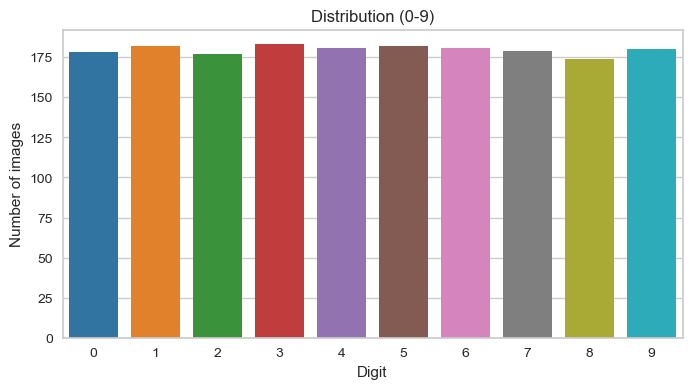

In [373]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=data, palette='tab10')

plt.title("Distribution (0-9)")
plt.xlabel("Digit")
plt.ylabel("Number of images")
plt.show()

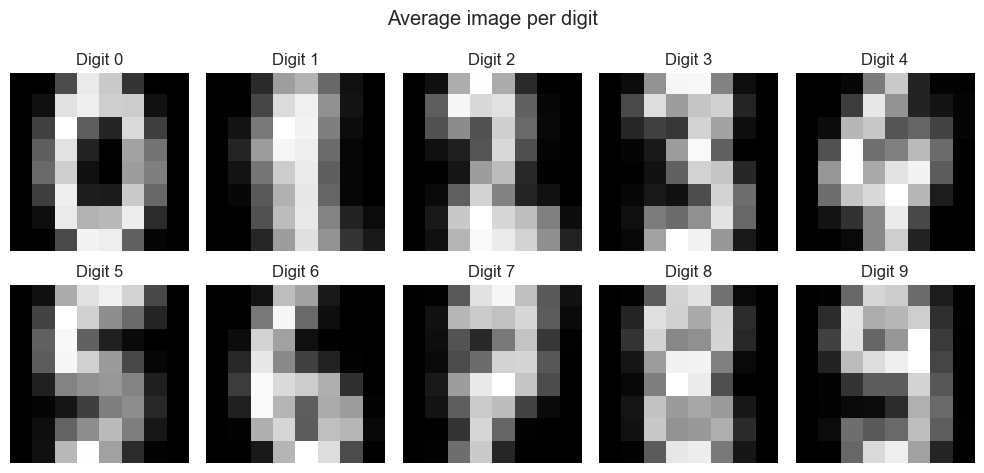

In [374]:
# mean by digit
mean_images = np.zeros((10, 64))  # 64 pixels
for i in range(10):
    mean_images[i] = data.loc[data.label == i, column_names].mean(axis=0)


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(mean_images[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.suptitle("Average image per digit")
plt.tight_layout()
plt.show()

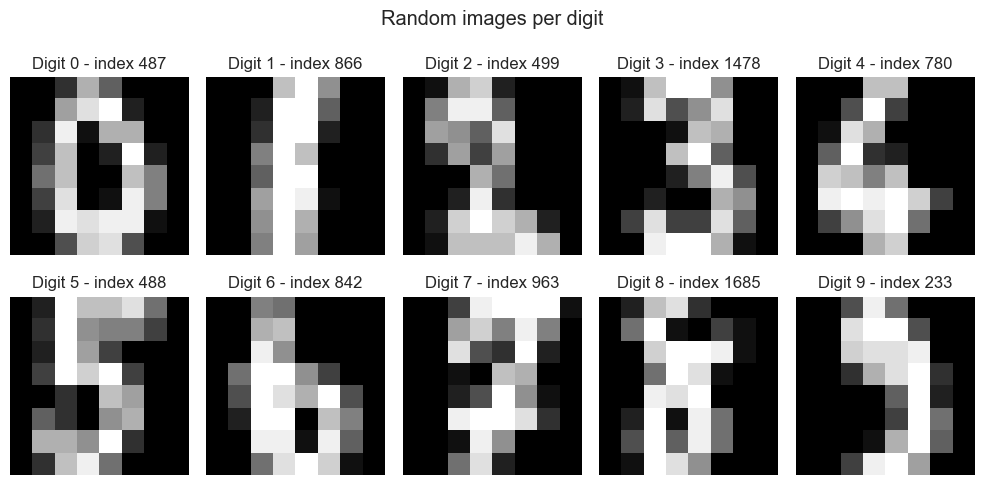

In [375]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91, hspace=0.5)

for i, label in enumerate(np.unique(labels)):
    ax = axs[i // 5, i % 5]
    # Random choice by digit
    idx = np.random.choice(np.where(labels == label)[0])
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(f"Digit {label} - index {idx}")
    ax.axis('off')

plt.suptitle("Random images per digit")
plt.tight_layout()
plt.show();

## Define our evaluation benchmark

We will define first our evaluation benchmark. During this benchmark, we intend to compare different initialization methods for KMeans. Our benchmark will:

create a pipeline which will scale the data using a StandardScaler;

train and time the pipeline fitting;

measure the performance of the clustering obtained via different metrics.


In [376]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    #pipeline (scaling, model)
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=500,
        )
    ]
    
    


    # Show the results
    formatter_result = (
        "{:9s}\t\t\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t\t{:.3f}\t{:.3f}"
    )
    
    print(formatter_result.format(*results))
    
    return results
    

### Run benchmark

In [377]:
print(82 * "_")

print("init\t\t\t\ttime\tinertia\thomo\tcompl\tv-measure\tARI\tsilhouette")

#1------- k-means++ appliquée au données
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=X, labels=labels)

#2-------k-means++ appliquée au données
kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=X, labels=labels)

#3------- k-means++ appliquée au 10 premières composantes principales ou 99% de l'information
    #---------
pca = PCA(n_components=0.99).fit(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
bench_k_means(kmeans=kmeans, name="PCA-based2",data=pca.transform(X), labels=labels)
    #---------
pca = PCA(n_components=n_digits).fit(X) # nombre de composantes principales retenus 
kmeans = KMeans(init="k-means++",n_clusters=n_digits, n_init=4)
bench_k_means(kmeans=kmeans, name="PCA-based1",data=pca.transform(X), labels=labels)
#-------

print(82 * "_")

print(f"CA n component:\t\t\t\t\t\t\t\t\t {pca.n_components_}")

__________________________________________________________________________________
init				time	inertia	homo	compl	v-measure	ARI	silhouette
k-means++			0.601s	4647	0.739	0.747	0.743		0.669	0.179
random   			0.572s	4648	0.735	0.742	0.738		0.667	0.176
PCA-based2			0.619s	1302	0.743	0.757	0.750		0.657	0.159
PCA-based1			0.619s	266	0.726	0.731	0.729		0.649	0.257
__________________________________________________________________________________
CA n component:									 10


In [378]:
print(n_digits)

10


In [379]:
print(kmeans.cluster_centers_)

[[0.8637737  0.48185483 0.33867288 0.4107639  0.46797154 0.47166884
  0.52444205 0.65781776 0.48740101 0.52774909]
 [0.27079448 0.65351751 0.42555991 0.40671976 0.4968278  0.52827378
  0.37842053 0.47113163 0.63469346 0.55929516]
 [0.55729096 0.25498828 0.56284349 0.43200227 0.37964886 0.28119772
  0.34703954 0.37976995 0.50705852 0.5191108 ]
 [0.49653441 0.20006332 0.29559571 0.57367974 0.28992388 0.6868582
  0.4049249  0.52330472 0.49829791 0.50912263]
 [0.188729   0.48343091 0.46752337 0.36532145 0.44496581 0.50742424
  0.45039277 0.57087855 0.26608239 0.50393425]
 [0.74038629 0.67667503 0.68899465 0.42062953 0.4605121  0.69600742
  0.40100435 0.38247161 0.42666278 0.51295624]
 [0.47093067 0.39046494 0.47336437 0.67773447 0.75701445 0.41510602
  0.42516497 0.45841682 0.41872679 0.44881347]
 [0.50962875 0.40871522 0.20791961 0.28960594 0.56479444 0.44370436
  0.50462434 0.29680864 0.57512921 0.42193967]
 [0.52190911 0.84042897 0.39676579 0.58734086 0.29153887 0.26754123
  0.49580555 

la méthode kmeans avec les composantes principales a en général des performances meilleures

In [380]:
X_pca=pca.transform(X)

In [381]:
pca1=PCA(n_components=.95).fit(X)
pca1.components_

array([[-1.77484909e-19, -1.73094651e-02, -2.23428835e-01, ...,
        -8.94184677e-02, -3.65977111e-02, -1.14684954e-02],
       [ 3.27805401e-18, -1.01064569e-02, -4.90849204e-02, ...,
         1.76697117e-01,  1.94547053e-02, -6.69693895e-03],
       [-1.68358559e-18,  1.83420720e-02,  1.26475543e-01, ...,
         2.32084163e-01,  1.67026563e-01,  3.48043832e-02],
       ...,
       [ 1.33815481e-17,  8.24410330e-03,  1.42774093e-01, ...,
        -1.07466629e-02,  3.38995330e-01,  1.58789644e-01],
       [-3.84384960e-18,  9.17016581e-03,  4.17946439e-02, ...,
         1.30708382e-01, -1.34487279e-02,  2.11313565e-02],
       [-4.85442521e-18,  1.79906763e-03, -4.74972508e-02, ...,
         3.01741290e-02,  8.16530266e-02,  5.93242720e-02]])

## Optimal number of clusters

In [382]:
scaler = MinMaxScaler()  # StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method

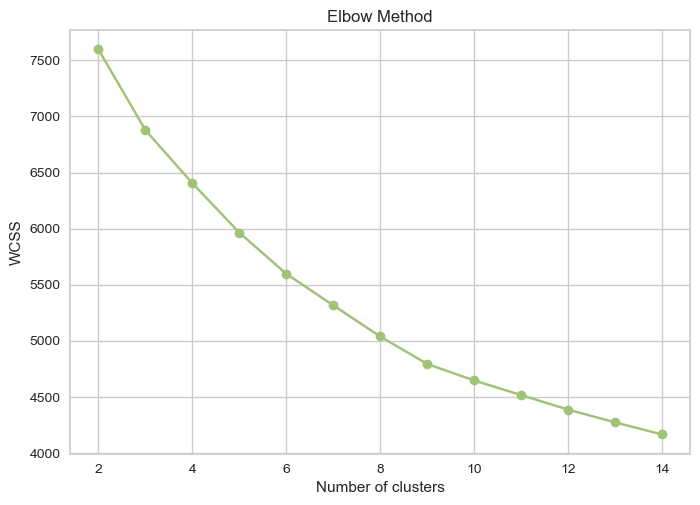

In [383]:
#il s'agit de regarder le coude

wcss = []  # Within-Cluster Sum of Squares 

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Entre 8 et 12

### Yellow brick lib

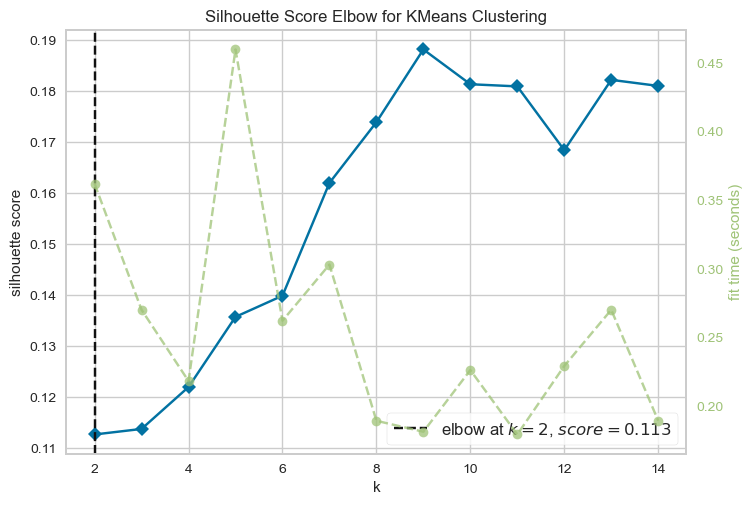

In [384]:
# Instantiate the clustering model and visualizer

# - **distortion**: mean sum of squared distances to centers
# - **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
# - **calinski_harabasz**: ratio of within to between cluster dispersion

        
visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=True, # True or False
                             )

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

## Visualize the results on PCA-reduced data


### Profiling: cluster persona

In [385]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

kmean_labels = kmeans.labels_

In [386]:
data["cluster"] = kmean_labels
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label,cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,6
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,8
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,3
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,7
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,1


In [387]:

contingency_table = pd.crosstab(data["cluster"], data["label"])
contingency_table

label,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0,0,120,37,0,4,0,2,4,5
1,1,3,0,0,150,2,27,1,1,0
2,2,26,31,11,0,42,0,1,69,19
3,0,51,13,0,5,55,2,37,69,10
4,3,5,4,26,0,43,0,0,3,124
5,0,9,5,12,3,23,0,115,24,9
6,157,0,0,0,0,6,7,0,0,0
7,0,0,3,97,0,1,0,0,0,12
8,0,88,1,0,7,1,0,23,4,0


In [388]:
major_digit = contingency_table.idxmax(axis=1)
print(major_digit)

cluster
0    2
1    4
2    8
3    8
4    9
5    7
6    0
7    3
8    1
9    6
dtype: int32


# Analyse des centroïdes

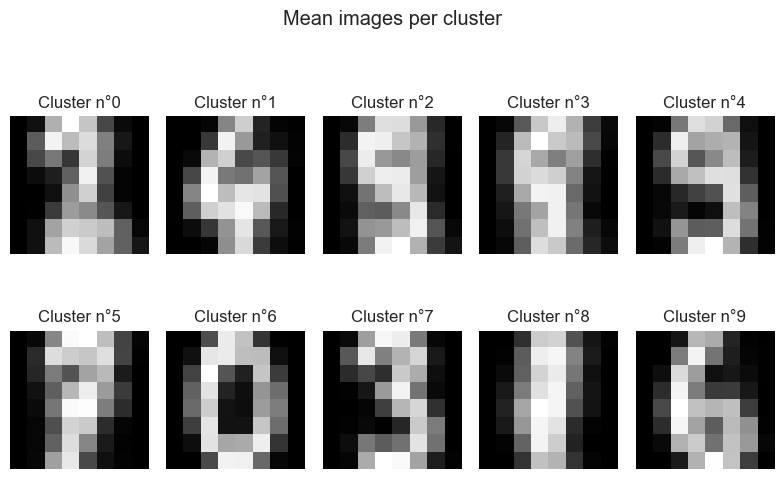

In [389]:
for cluster_id in range(n_digits):
    cluster_indices = np.where(kmean_labels == cluster_id)
    cluster_images = X[cluster_indices]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)

    plt.subplot(2, 5, cluster_id + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Cluster n°{cluster_id}")
    plt.axis('off')

plt.suptitle("Mean images per cluster")
plt.tight_layout()
plt.show()

### Visualization

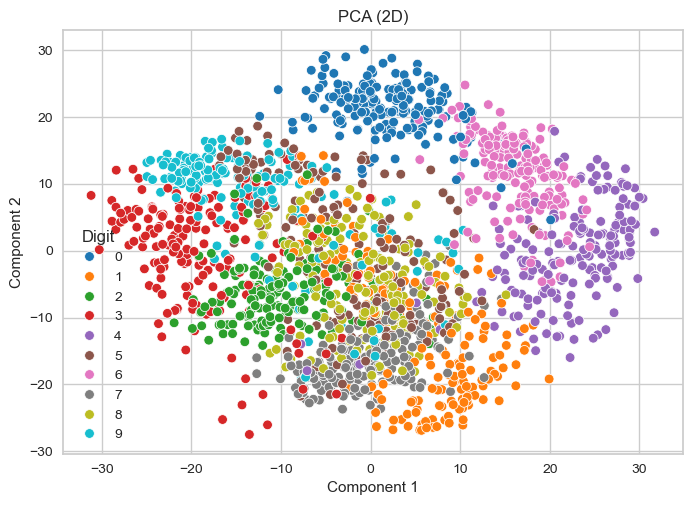

In [390]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data.label, palette='tab10', legend='full')
plt.title("PCA (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Digit")
plt.show()


Tsne a la possibilité de distinguer les différences.

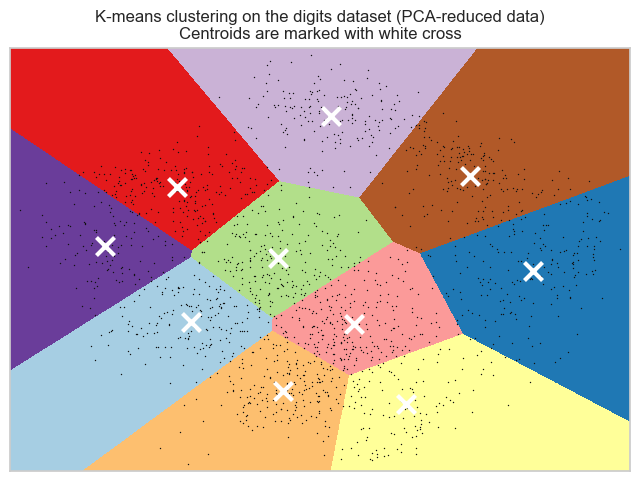

In [391]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

## Intercluster Distance Maps

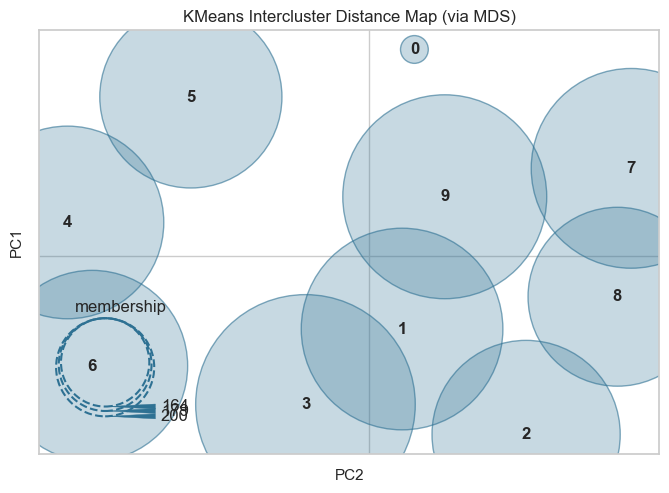

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [392]:
# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Visualisation with TSNE

In [393]:
# Initialize

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)


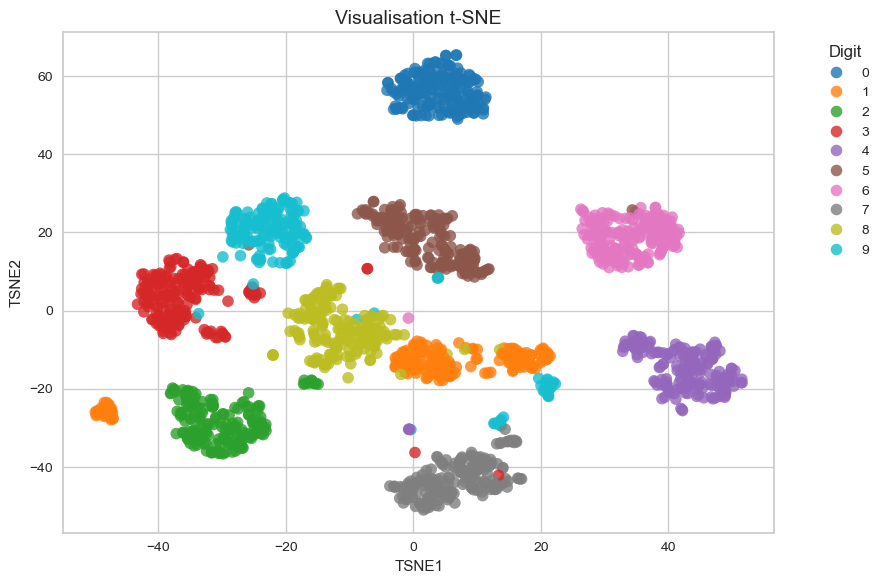

In [394]:
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = labels # Conversion en string pour une discrétisation catégorielle

plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='label',
    palette='tab10',
    alpha=0.8,
    s=70,
    edgecolor='none'
)

plt.title('Visualisation t-SNE', fontsize=14)
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


---
---
---

# TP Clustering

TP Clustering

Optimiser k-means avec au moins 3 hyperparametres (nombre de clusters, etc)

Tester l'optimisation avec ou sans réduction de dimension (Avec ou sans PCA)

Tester avec ou sans standardisation (Minmax, Standardscaller, Robustscaller)

Montrer la visualisation et l'analyse des clusters choisies (Avec t-sne par exemple)

Choix de la meilleure approche de clustering

Faire l'analyse des personnas pour le meilleur modèle


Objet : TPISE-Clustering 2025

Jeudi 22/05/2025 à 18h00

---
---
---

<!-- Bannière de titre -->
<div style="background-color:#2E86C1;padding:15px;border-radius:10px;color:white;text-align:center;">
  <h1>TP : CLUSTERING </h1>
  <p><em>Nom : TRAORE SIE RACHID &nbsp; | &nbsp; Date : 22/05/2025</em></p>
</div>

---


##  Étapes du TP

<div style="border-left: 5px solid #2980B9; padding: 10px;">
  <ul>
    <li><strong>Étape 1 :</strong> Optimiser k-means avec au moins 3 hyperparametres (nombre de clusters, etc)
</li>
    <li><strong>Étape 2 :</strong> Tester l'optimisation avec ou sans réduction de dimension (Avec ou sans PCA)</li>
    <li><strong>Étape 3 :</strong> Tester avec ou sans standardisation (Minmax, Standardscaller, Robustscaller)</li>
    <li><strong>Étape 4 :</strong> Montrer la visualisation et l'analyse des clusters choisies (Avec t-sne par exemple)</li>
    <li><strong>Étape 5 :</strong> Choix de la meilleure approche de clustering</li>
    <li><strong>Étape 6 :</strong> Faire l'analyse des personnas pour le meilleur modèle</li>
  </ul>
</div>

---

<div style="text-align:center;color:gray;font-size:0.9em;">
  <em>TP réalisé par  TRAORE SIE RACHID  — 22/05/2025</em>
</div>


Nous allons construire une fonction qui va permettre de prendre en compte les différents scénarios, c'est-à dire avec sans PCA , avec plusieurs types de standardisations

In [395]:

def evaluate_clustering(X, scaler, reducer, k):
    pipeline = []
    if scaler:
        pipeline.append(scaler)
    if reducer:
        pipeline.append(reducer)
    for step in pipeline:
        X = step.fit_transform(X)
    model = KMeans(n_clusters=k, random_state=42)
    clusters = model.fit_predict(X)
    score = silhouette_score(X, clusters)
    return score, clusters, model, X

scalers = {
    'MinMax': MinMaxScaler(),
    'Standa': StandardScaler(),
    'Robust': RobustScaler(),
    'Nan': None
}

reducers = {
    'PCA': PCA(n_components=0.99),
    'Nan': None
}

k_values = range(5, 14)
results = []



---
---
---

In [396]:

for scaler_name, scaler in scalers.items():
    for reducer_name, reducer in reducers.items():
        for k in k_values:
            score, _, _, _ = evaluate_clustering(X, scaler, reducer, k)
            results.append({
                'Scaler': scaler_name,
                'Reducer': reducer_name,
                'k': k,
                'Silhouette': score
            })

---
---
---

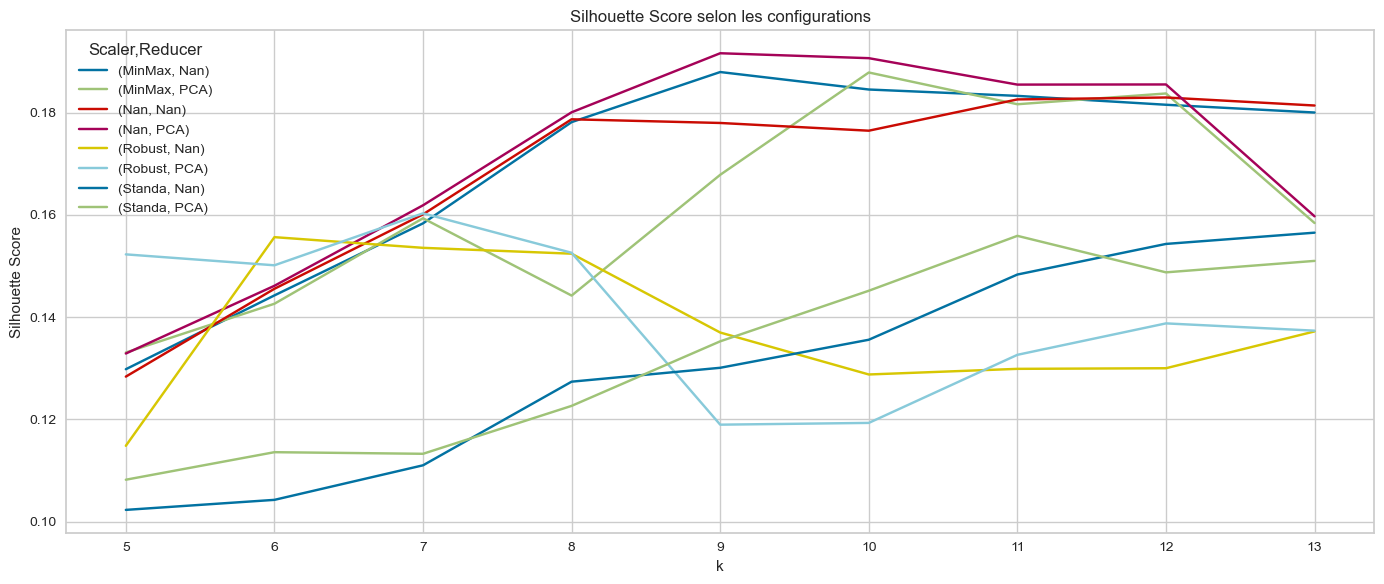

In [397]:

results_df = pd.DataFrame(results)
pivot = results_df.pivot_table(index='k', columns=['Scaler', 'Reducer'], values='Silhouette')
pivot.plot(figsize=(14, 6), title="Silhouette Score selon les configurations")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


**On peut constater que 9 est le nombre de clusters optimal**

---
---
---

In [400]:
results_df.sort_values(by="Silhouette", ascending=False)

,Scaler,Reducer,k,Silhouette
58,Nan,PCA,9,0.191626
59,Nan,PCA,10,0.190662
13,MinMax,Nan,9,0.187950
5,MinMax,PCA,10,0.187862
61,Nan,PCA,12,0.185520
...,...,...,...,...
20,Standa,PCA,7,0.113272
29,Standa,Nan,7,0.111021
18,Standa,PCA,5,0.108199
28,Standa,Nan,6,0.104261


In [401]:

best_config = results_df.sort_values(by="Silhouette", ascending=False).iloc[0]
print("Meilleure configuration :")
print(best_config)

best_scaler = scalers[best_config['Scaler']]
best_reducer = reducers[best_config['Reducer']]
best_k = best_config['k']


Meilleure configuration :
Scaler             Nan
Reducer            PCA
k                    9
Silhouette    0.191626
Name: 58, dtype: object


---
---
---

In [402]:
_, clusters, model, X_transformed = evaluate_clustering(X, best_scaler, best_reducer, best_k)

---
---
---

In [403]:
print("\nBenchmark du meilleur modèle KMeans :")
print("init\t\t\t\ttime\tinertia\thomo\tcompl\tv-measure\tARI\tsilhouette")
kmeans_best = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
bench_k_means(kmeans_best, "Best Config", X_transformed, labels)


Benchmark du meilleur modèle KMeans :
init				time	inertia	homo	compl	v-measure	ARI	silhouette
Best Config			0.260s	1319	0.700	0.753	0.725		0.604	0.176


['Best Config',
 0.2603037357330322,
 1318.6898243793494,
 0.6996781301165151,
 0.7527930158439669,
 0.7252644035722681,
 0.6035280882561092,
 0.17582136544750476]

---
---
---

In [404]:
print("\nBenchmark complet pour toutes les configurations :\n")
print("init\t\t\t\ttime\tinertia\thomo\tcompl\tv-measure\tARI\tsilhouette")

for scaler_name, scaler in scalers.items():
    for reducer_name, reducer in reducers.items():
        if scaler:
            X_scaled = scaler.fit_transform(X)
        else:
            X_scaled = X.copy()

        if reducer:
            X_reduced = reducer.fit_transform(X_scaled)
        else:
            X_reduced = X_scaled

        for k in k_values:
            name = f"{scaler_name}+{reducer_name}+k={k}"
            kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
            bench_k_means(kmeans, name, X_reduced, labels)


Benchmark complet pour toutes les configurations :

init				time	inertia	homo	compl	v-measure	ARI	silhouette
MinMax+PCA+k=5			0.504s	1529	0.426	0.625	0.507		0.358	0.114
MinMax+PCA+k=6			0.224s	1498	0.473	0.651	0.548		0.363	0.137
MinMax+PCA+k=7			0.219s	1475	0.470	0.619	0.534		0.344	0.124
MinMax+PCA+k=8			0.333s	1421	0.610	0.714	0.658		0.487	0.146
MinMax+PCA+k=9			0.216s	1398	0.638	0.710	0.672		0.499	0.162
MinMax+PCA+k=10			0.278s	1379	0.676	0.698	0.687		0.567	0.145
MinMax+PCA+k=11			0.202s	1365	0.685	0.691	0.688		0.554	0.145
MinMax+PCA+k=12			0.172s	1340	0.794	0.749	0.771		0.712	0.179
MinMax+PCA+k=13			0.208s	1322	0.797	0.732	0.763		0.682	0.165
MinMax+Nan+k=5			0.161s	6134	0.393	0.587	0.471		0.293	0.125
MinMax+Nan+k=6			0.166s	5672	0.525	0.703	0.601		0.426	0.149
MinMax+Nan+k=7			0.201s	5324	0.573	0.700	0.630		0.478	0.157
MinMax+Nan+k=8			0.142s	5039	0.673	0.770	0.719		0.581	0.179
MinMax+Nan+k=9			0.164s	4796	0.692	0.749	0.719		0.596	0.193
MinMax+Nan+k=10			0.191s	4673	0.717	0.745	0.73

### Elbow method

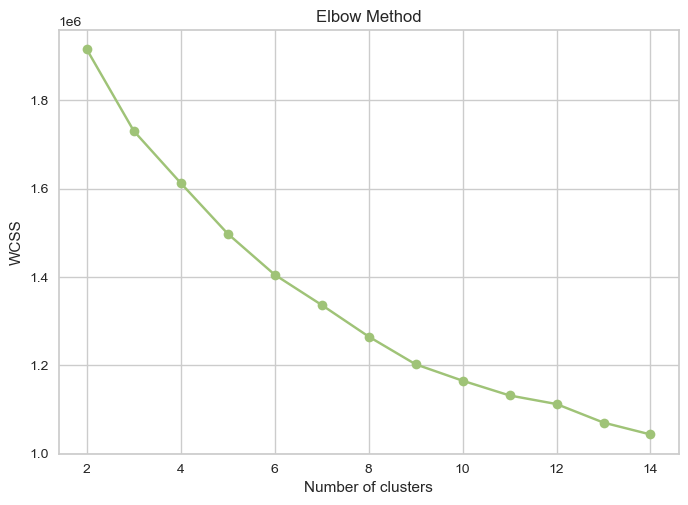

In [405]:
#il s'agit de regarder le coude

wcss = []  # Within-Cluster Sum of Squares 

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Yellow brick lib

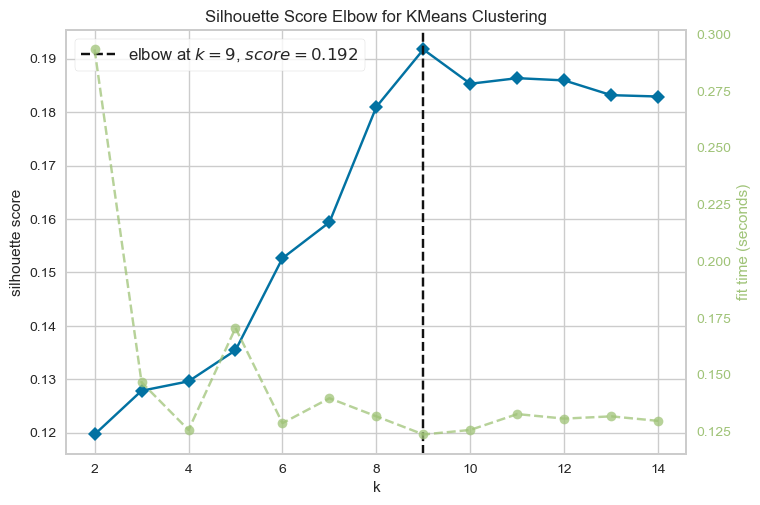

In [406]:
# Instantiate the clustering model and visualizer

# - **distortion**: mean sum of squared distances to centers
# - **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
# - **calinski_harabasz**: ratio of within to between cluster dispersion

        
visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=True, # True or False
                             )

visualizer.fit(X_transformed)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

---
---
---

# VISUALISATION AVEC TSNE

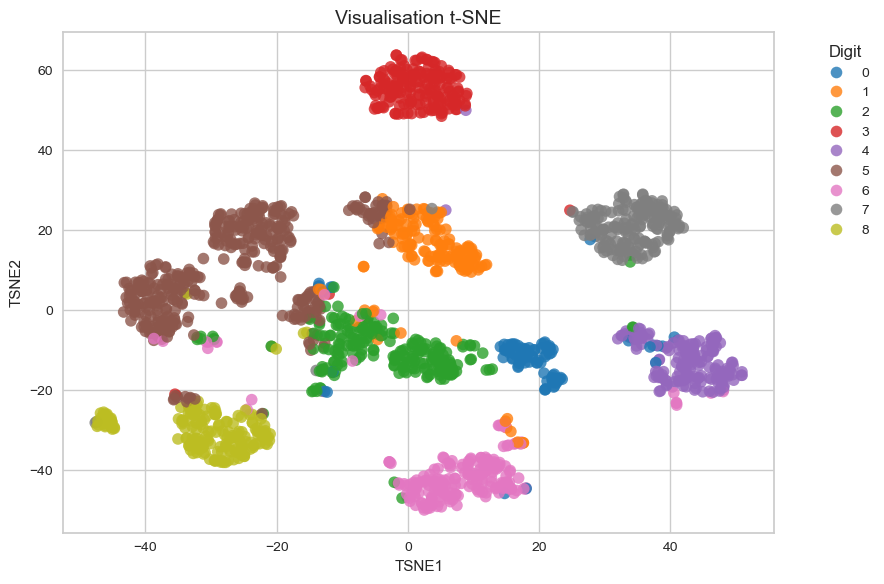

In [407]:

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_transformed)

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = clusters 

# Conversion en string pour une discrétisation catégorielle

# Plot
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='label',
    palette='tab10',
    alpha=0.8,
    s=70,
    edgecolor='none'
)

plt.title('Visualisation t-SNE', fontsize=14)
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


---
---
---

# Analyse des personas

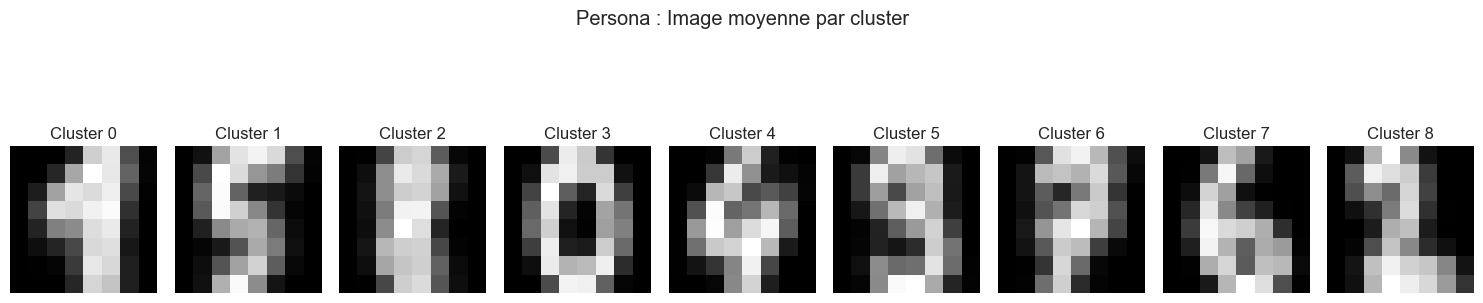

In [408]:
df_clusters = pd.DataFrame(X)
df_clusters['cluster'] = clusters

fig, axs = plt.subplots(1, best_k, figsize=(15, 4))
for i in range(best_k):
    mean_img = df_clusters[df_clusters.cluster == i].drop('cluster', axis=1).mean().values.reshape(8, 8)
    axs[i].imshow(mean_img, cmap='gray')
    axs[i].set_title(f'Cluster {i}')
    axs[i].axis('off')
plt.suptitle("Persona : Image moyenne par cluster")
plt.tight_layout()
plt.show()


---
---
---

In [409]:
contingency = pd.crosstab(index=clusters, columns=labels)
print("Contingence clusters vs vraies classes :")
display(contingency)

Contingence clusters vs vraies classes :


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,55,2,0,7,0,1,2,7,20
1,0,1,0,2,0,140,0,5,8,7
2,0,99,8,7,2,0,2,2,101,0
3,177,0,1,0,0,0,1,0,1,0
4,1,0,0,0,163,1,0,0,0,0
5,0,0,12,165,0,39,0,0,47,145
6,0,0,3,8,9,0,0,170,4,8
7,0,2,0,0,0,2,177,0,2,0
8,0,25,151,1,0,0,0,0,4,0


---
---
---

In [410]:
major_digit = contingency.idxmax(axis=1)
print(major_digit)

row_0
0    1
1    5
2    8
3    0
4    4
5    3
6    7
7    6
8    2
dtype: int32


Le modèle n'arrive pas à detecter les images Numero 9

---
---
---